# GRIP - THE SPARK FOUNDATION
DATA SCIENCE & BUSINESS ANALYTICS TASK 1 [ Prediction Using Supervised ML ]

### AUTHOR : AISHWARYA K

_____________________________________________________________________

### TASK 1 
Predict the percentage of a student based on the number of study hours and also the score if a student studies for 9.25 hrs/ day using simple linear regression in Python

### GIVEN 

--> The given dataset contains two columns with number of study hours and the marks scored by them. 

--> Dataset : http://bit.ly/w-data


________________________________________________________________

### IMPORTING THE REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import linear_model

### LOAD & READ THE DATASET

In [2]:
url = "http://bit.ly/w-data"
dt = pd.read_csv(url)
print("\nData imported successfully\n")



Data imported successfully



In [3]:
dt.shape

(25, 2)

In [4]:
dt.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
dt.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
dt.groupby(['Hours'])['Scores'].mean()

Hours
1.1    17.0
1.5    20.0
1.9    24.0
2.5    25.5
2.7    27.5
3.2    27.0
3.3    42.0
3.5    30.0
3.8    35.0
4.5    41.0
4.8    54.0
5.1    47.0
5.5    60.0
5.9    62.0
6.1    67.0
6.9    76.0
7.4    69.0
7.7    85.0
7.8    86.0
8.3    81.0
8.5    75.0
8.9    95.0
9.2    88.0
Name: Scores, dtype: float64

### EXPLORING & VISUALIZING THE DATASET

##### Plotting the distribution of scores

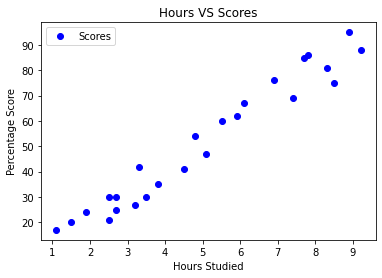

In [8]:
dt.plot(x='Hours', y='Scores', style='bo')  
plt.title('Hours VS Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.style.use('bmh')
plt.show()

In [9]:
dt.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0.5, 1.0, 'Plotting the Regression Line')

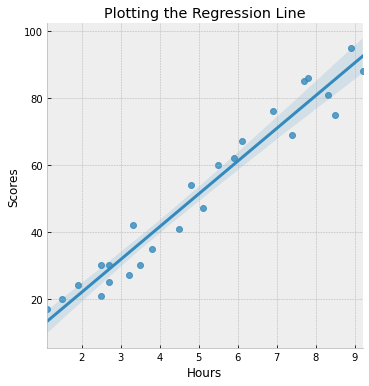

In [10]:
sns.lmplot(x="Hours",y="Scores", data=dt)
plt.title("Plotting the Regression Line")
#sns.regplot(x="Hours", y="Scores", data=dt)

From the graph above, we can clearly understand that there is a positive linear relationship between the number of hours studied and the scores obtained. We can say that with the increase of Hours studied(x), increases the scores obtained(y).

____________________________________________________________________________

### PREPARING THE DATA
###### Splitting the data into "attributes" (inputs variables) and "labels" (outputs variables) as x and y

In [11]:
x = dt.iloc[:, :-1].values  
y = dt.iloc[:, 1].values

##### Splitting the data into training and test sets

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0) 

### TRAINING THE MODEL

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("\nModel Training Completed\n")


Model Training Completed



### PREDICTING THE TEST RESULTS

In [14]:
y_pred = regressor.predict(x_test)
y_pred

array([17.04289179, 33.51695377, 74.21757747, 26.73351648, 59.68164043,
       39.33132858, 20.91914167, 78.09382734, 69.37226512])

##### Comparing the Actual & Predicted Data

In [15]:
dt = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})  
dt

,Actual Score,Predicted Score
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265


### VISUALIZING THE TRAINING SET & TEST SET RESULTS
##### Visualizing the Training set results

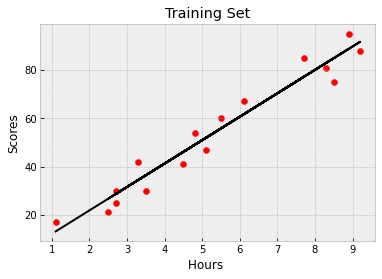

In [16]:
# PLotting the training set
plt.scatter(x_train,y_train, color='red')
plt.plot(x_train,regressor.predict(x_train),color='black')
plt.title('Training Set')
plt.xlabel('Hours ')
plt.ylabel('Scores')
plt.show()

##### Visualizing the Test set results

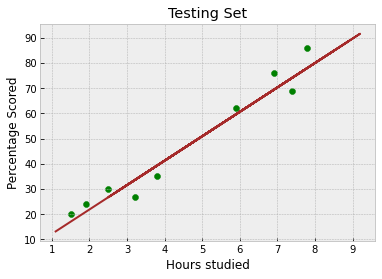

In [17]:
# PLotting the test set
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_train, regressor.predict(x_train), color = 'brown')
plt.title('Testing Set')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scored')
plt.show()

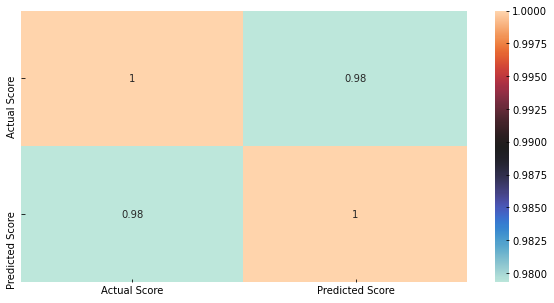

In [18]:
# Checking the correlations
plt.figure(figsize=(10,5))
sns.heatmap(dt.corr(),annot=True,cmap="icefire",annot_kws={'fontsize':10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### VISUALIZING THE DIFFERENCES BETWEEN ACTUAL SCORE & PREDICTED SCORE

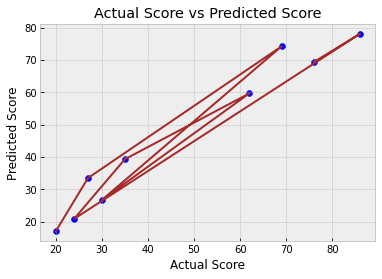

In [19]:
plt.scatter(y_test,y_pred,c='b')
plt.plot(y_test,y_pred,c='brown')
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual Score vs Predicted Score")
plt.show()


### MODEL EVALUATION FOR LINEAR REGRESSION


In [20]:
from sklearn import metrics
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred,squared=False))


Mean Absolute Error :  4.691397441397438
Mean Squared Error :  25.463280738222547
Root Mean Squared Error :  5.046115410711743


##### Mean absolute error: 4.691397441397438 which is quite accurate model for predicting the result
 

### PREDICTING THE SCORE OF A STUDENT WHEN HE/ SHE STUDY 9.25 HRS/ DAY

In [21]:
hours = [[9.25]]
hrs = 9.25
ppred = regressor.predict(hours)
print("\nNo of Hours : {}".format(hrs))
print("\nPredicted Score : {}".format(ppred[0]))


No of Hours : 9.25

Predicted Score : 92.14523314523314


##### Checking accuracy of our model

In [22]:
print("Train : ",regressor.score(x_train,y_train)*100)
print("Test : ",regressor.score(x_test,y_test)*100)

Train :  95.01107277744313
Test :  95.5570080138813


### THANK YOU